In [1]:
import lbg_forecast.priors_gp_massfunc as gpmf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import lbg_forecast.utils as utils


mass_function_prior = gpmf.MassFunctionPrior('.', mean=False)


In [2]:
run='test_0'

#spsp = np.load("sps_parameter_samples/sps_"+run+"_"+str(id)+".npy")
#photometry = np.load("photo_samples/photo_"+run+"_"+str(id)+".npy")
#ntot = np.load("sps_parameter_samples/nlsst_"+run+"_"+str(id)+".npy")*utils.FULL_SKY_DEG2

spsp = np.load("sps_parameter_samples/sps_"+run+".npy")
photometry = np.load("photo_samples/photo_"+run+".npy")
ntot = np.load("sps_parameter_samples/nlsst_"+run+".npy")


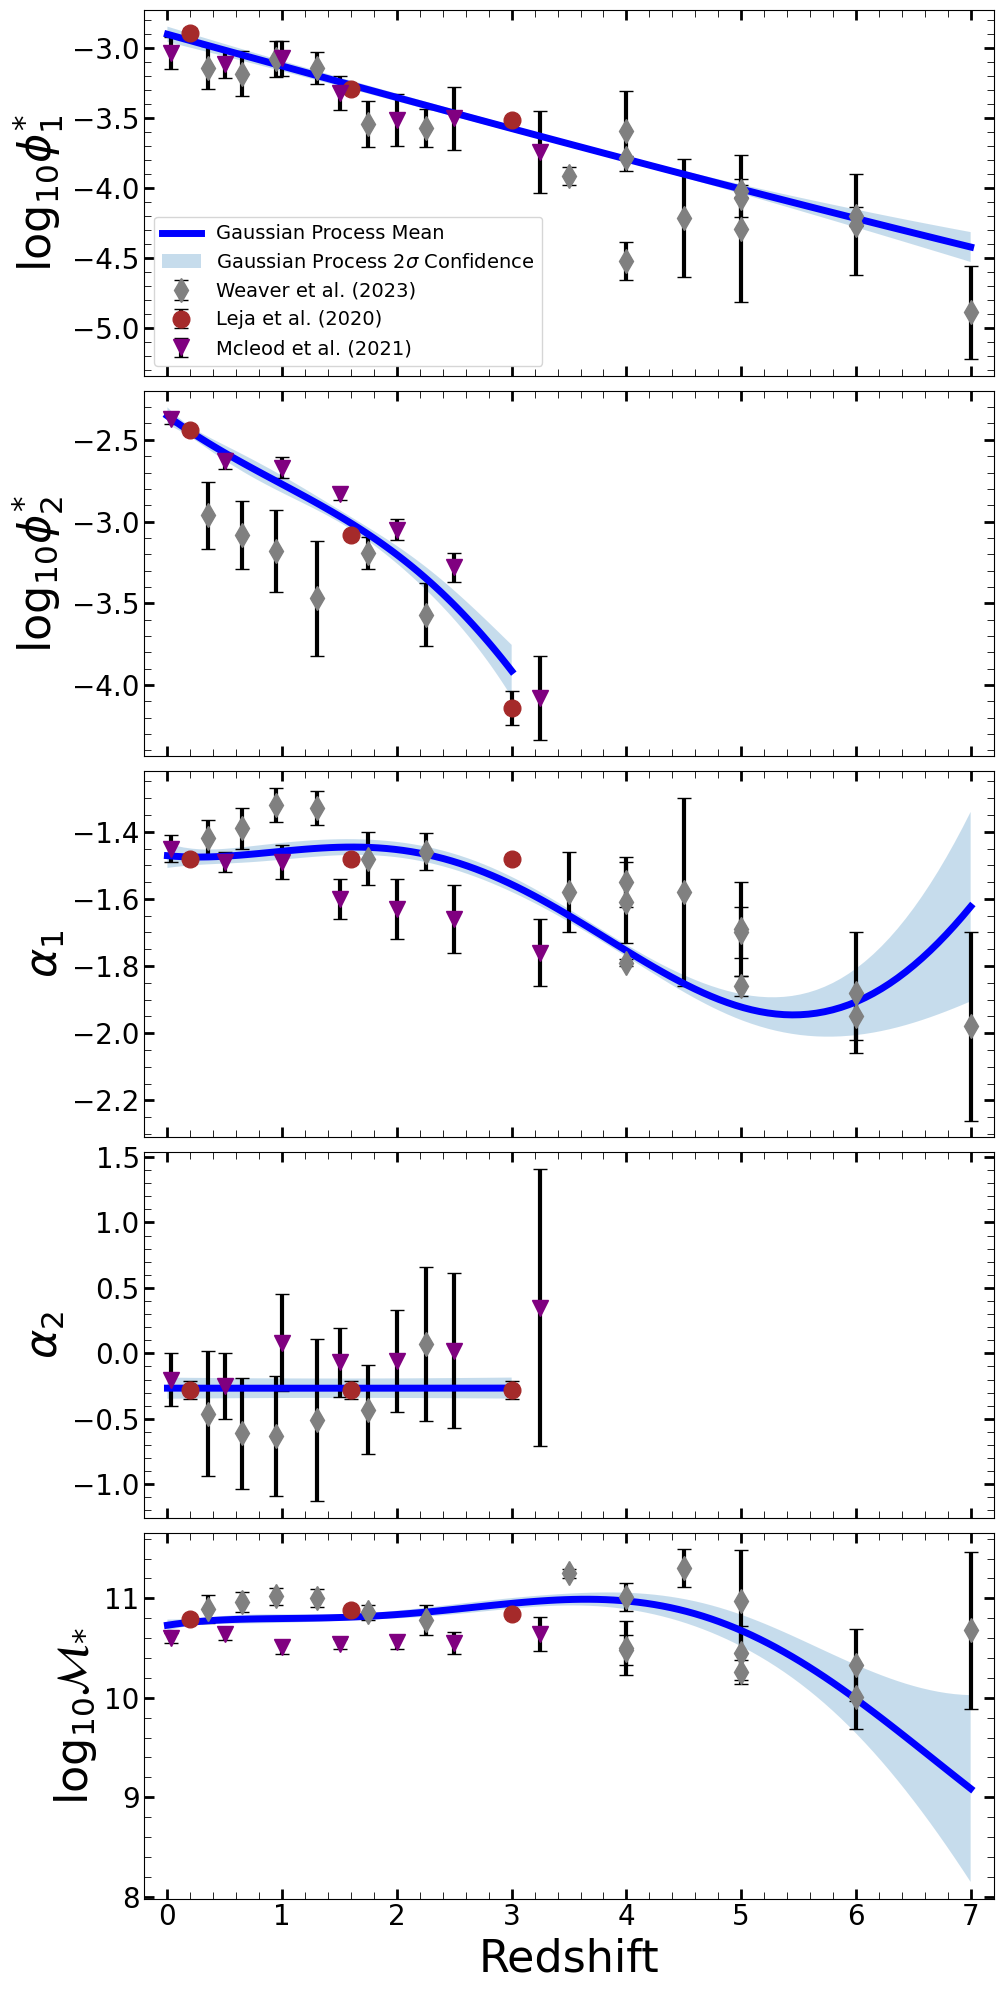

In [2]:
mass_function_prior.plot_confidence()

In [6]:
print("LSST Number Density: ", mass_function_prior.lsst_number_density(mass_function_prior.sample_prior_mean()))


LSST Number Density:  2582112.4233077243


In [7]:
N_tot=[]
for i in range(2):
    N_tot.append(mass_function_prior.lsst_number_density(mass_function_prior.sample_prior()))

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


In [8]:
percentile=99

mean = np.mean(N_tot)
errl = np.percentile(N_tot, 100-percentile)
errh = np.percentile(N_tot, percentile)
std = np.std(N_tot)

print("LSST Number Density (all galaxies): ", mean, "-", mean-errl, "+",errh-mean)
print(3*std)

LSST Number Density (all galaxies):  2734150.9231268177 - 66406.05508096609 + 66406.05508096563
203283.84208458918


(0.0, 7.0)

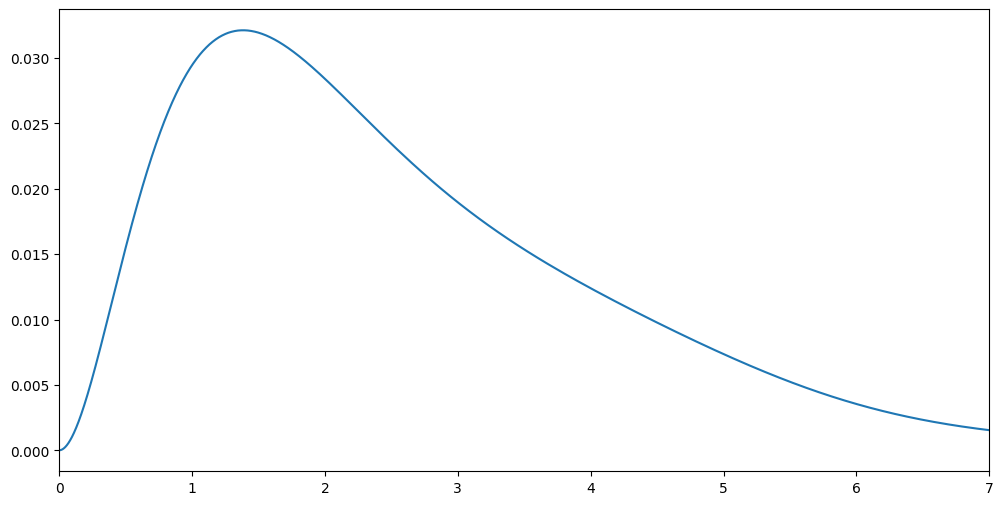

In [5]:
sparams = mass_function_prior.sample_prior_mean()

f, ax =plt.subplots(1, 1, figsize=(12, 6))

norm = mass_function_prior.n_tot(sparams)
dvdz = mass_function_prior.dvdz(mass_function_prior.z_grid, mass_function_prior.dz)

zs = mass_function_prior.z_grid
logms = mass_function_prior.logm_grid

#i=0
#n_z=[]
#for z in zs:
#    n_logm = mass_function_prior.normalised_mass_function(z, mass_function_prior.logm_grid, sparams, norm, dvdz[i])
#    n_logm = np.trapz(n_logm, mass_function_prior.logm_grid)
#    n_z.append(n_logm)
#    i+=1

#print(np.trapz(n_z, mass_function_prior.z_grid))

n=[]
i=0
for z in zs:
    n.append(mass_function_prior.normalised_mass_function(z, 9, sparams, norm, dvdz[i]))

    i+=1

ax.plot(zs, n)
ax.set_xlim(0, 7)
#ax.set_ylim(0, 0.018)

In [ ]:
n_prior_samples = 100
nsamples=1000000
zbins = np.linspace(0.0, 7.0, 100)
zarr=[]
nlssts=[]
#zs=[]
for i in range(n_prior_samples):
    zsamples, msamples, nlsst = mass_function_prior.sample_logpdf(nsamples)
    z_histogram = np.histogram(zsamples, bins=zbins, density=True)
    #zs.append(zsamples)
    zarr.append(z_histogram[0])
    nlssts.append(nlsst)



Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.
Calculating Normalisation ... 
MCMC Sampling ... 
MCMC Sampling Complete.


5766326868.109804 705985961.4701638


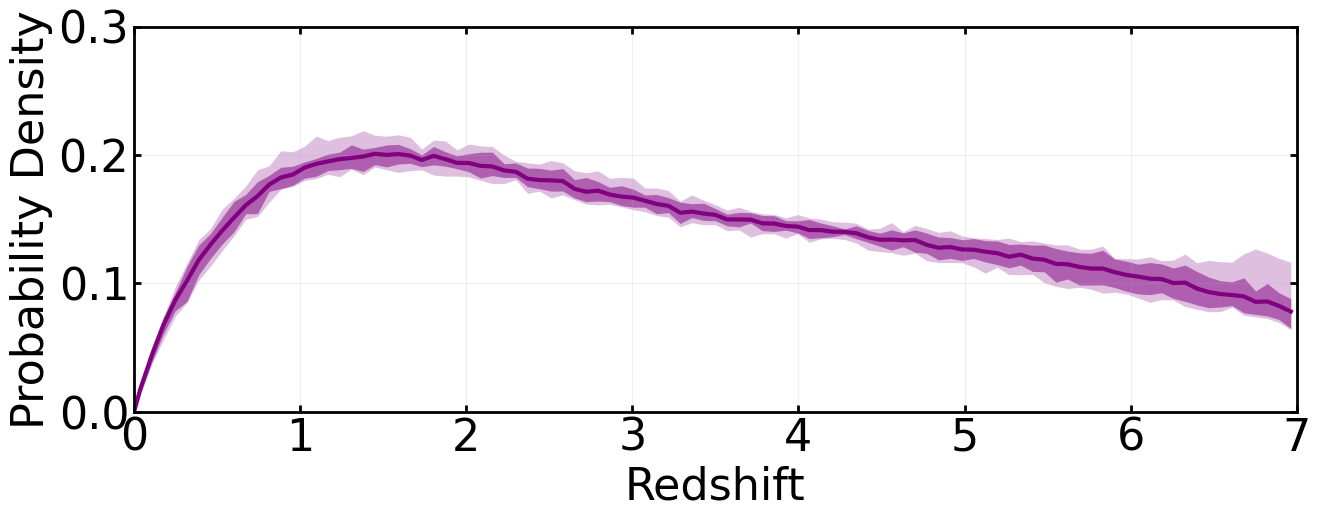

In [74]:
fig = plt.figure(figsize=(15, 5))
ax=fig.gca()

zs = np.vstack(np.array(zarr))
#np.save("zsamples_unnormalised.npy", zs)

#zs= np.load("zsamples_normalised.npy")

p1=84
percentile_zs1 = np.percentile(zs, [100-p1, 50, p1], axis=0)

p2=97.5
percentile_zs2 = np.percentile(zs, [100-p2, 50, p2], axis=0)

alpha=0.5
colour='purple'

zs_mean = np.concatenate((np.array([0]), np.mean(zs, axis=0)))
z_x = np.concatenate((np.array([0]), (zbins[:-1]+zbins[1:])/2))
upper1 = np.concatenate((np.array([0]), percentile_zs1[2, :]))
upper2 = np.concatenate((np.array([0]), percentile_zs2[2, :]))
lower1 = np.concatenate((np.array([0]), percentile_zs1[0, :]))
lower2 = np.concatenate((np.array([0]), percentile_zs2[0, :]))

fs=32
ax.plot(z_x, zs_mean, lw=3, color='purple', ls='-', label='Mean')
ax.fill_between(z_x, lower1,  upper1, alpha=alpha, color=colour, lw=0, label=str(100-p1)+"-"+str(p1)+"th Percentiles")
ax.fill_between(z_x, lower2,  upper2, alpha=alpha/2, color=colour, lw=0, label=str(100-p2)+"-"+str(p2)+"th Percentiles")
ax.set_xlabel('Redshift', fontsize=fs)
ax.set_ylabel('Probability Density', fontsize=fs)
ax.tick_params('x', labelsize=fs, width=2, size=5, direction='in', top=True)
ax.tick_params('y', labelsize=fs, width=2, size=5, direction='in', right=True)
ax.grid(visible=True, zorder=-1, alpha=0.2)
ax.set_xlim(0, 7)
ax.set_ylim(0, 0.3)
#ax.legend(fontsize=24)

lw=2
ax.spines['bottom'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['left'].set_linewidth(lw)

print(np.mean(nlssts), np.std(nlssts))


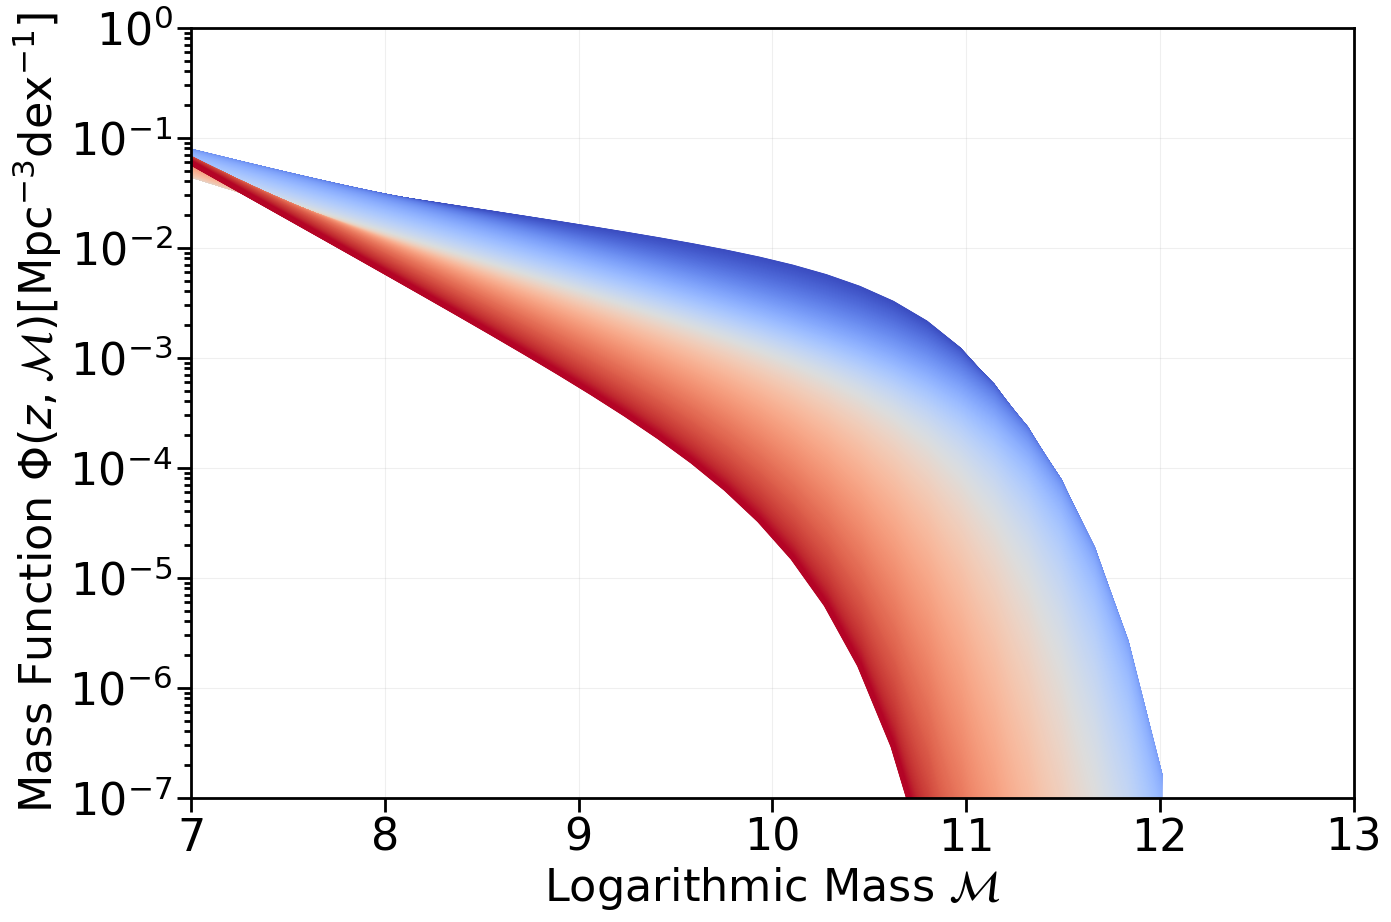

In [76]:
fig = plt.figure(figsize=(15, 10))
ax=fig.gca()

cmap = plt.get_cmap('coolwarm')

redshift = np.linspace(0, 7, 1000)
masses = np.linspace(7, 12, 30)
nsamples = 1
for z in redshift:
    mfunc_at_z = []
    for n in range(nsamples):
        mfunc = mass_function_prior.mass_function(z, masses, mass_function_prior.sample_prior_mean())
        mfunc_at_z.append(mfunc)

    mfunc_at_z = np.vstack(np.array(mfunc_at_z))
    mfunc_at_z_mean = np.mean(mfunc_at_z, axis=0)
    mfunc_at_z_err = np.percentile(mfunc_at_z, [95, 50, 5], axis=0)

    #print(mfunc_at_z_mean, mfunc_at_z_err[0, :])

    ax.plot(masses, mfunc_at_z_mean, color=cmap(z/7), label="$z$="+str(z), lw=3)
    ax.fill_between(masses, mfunc_at_z_err[0, :],  mfunc_at_z_err[2, :], color=cmap(z/7), alpha=0.3, lw=0)

fs=32            
ax.set_ylim(1e-7, 1e0)
ax.set_xlim(7, 13)
ax.set_ylabel("Mass Function $\Phi(z, \mathcal{M}) [\mathrm{Mpc}^{-3}\mathrm{dex}^{-1}]$", fontsize=fs)
ax.set_xlabel("Logarithmic Mass $\mathcal{M}$", fontsize=fs)
plt.tick_params('x', labelsize=fs, width=2, size=10)
plt.tick_params('y', labelsize=fs, width=2, size=10)

ax.tick_params(which='minor', width=2, size=5)

ax.set_yscale('log')
#ax.legend(loc="best", fontsize=24)
ax.grid(visible=True, zorder=-1, alpha=0.2)

lw=2
ax.spines['bottom'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['left'].set_linewidth(lw)

In [69]:
def plot_mass_function_in_zbin(ax, zl, zu):

    cmap = plt.get_cmap('viridis')

    dz=0.05
    redshift = np.linspace(zl, zu, int((zu-zl)/dz)+1)
    masses = np.linspace(7, 12, 30)
    nsamples = 2000

    mfunc_tot = []
    for z in redshift:
        mfunc_at_z = []
        for n in range(nsamples):
            mfunc = mass_function_prior.mass_function(z, masses, mass_function_prior.sample_prior())
            mfunc_at_z.append(mfunc)

        mfunc_at_z = np.vstack(np.array(mfunc_at_z))
        mfunc_tot.append(mfunc_at_z)

    mfunc_tot = np.vstack(np.array(mfunc_tot))
    mfunc_mean = np.mean(mfunc_tot, axis=0)
    p2=97.5
    p1=84
    mfunc_err = np.percentile(mfunc_tot, [p2, p1, 50, 100-p1, 100-p2], axis=0)

    ax.plot(masses, mfunc_mean, color=cmap(z/7), label="$z$="+str(np.mean(redshift)), lw=3)
    ax.fill_between(masses, mfunc_err[0, :],  mfunc_err[-1, :], color=cmap(z/7), alpha=0.3, lw=0)
    ax.fill_between(masses, mfunc_err[1, :],  mfunc_err[-2, :], color=cmap(z/7), alpha=0.3, lw=0)

    fs=32            
    ax.set_ylim(1e-7, 1e0)
    ax.set_xlim(7, 13)
    ax.set_ylabel("Mass Function $\Phi(z, \mathcal{M}) [\mathrm{Mpc}^{-3}\mathrm{dex}^{-1}]$", fontsize=fs)
    ax.set_xlabel("Logarithmic Mass $\mathcal{M}$", fontsize=fs)
    plt.tick_params('x', labelsize=fs, width=2, size=10)
    plt.tick_params('y', labelsize=fs, width=2, size=10)

    ax.tick_params(which='minor', width=2, size=5)

    ax.set_yscale('log')
    ax.legend(loc="best", fontsize=24)
    ax.grid(visible=True, zorder=-1, alpha=0.2)

    lw=2
    ax.spines['bottom'].set_linewidth(lw)
    ax.spines['top'].set_linewidth(lw)
    ax.spines['right'].set_linewidth(lw)
    ax.spines['left'].set_linewidth(lw)


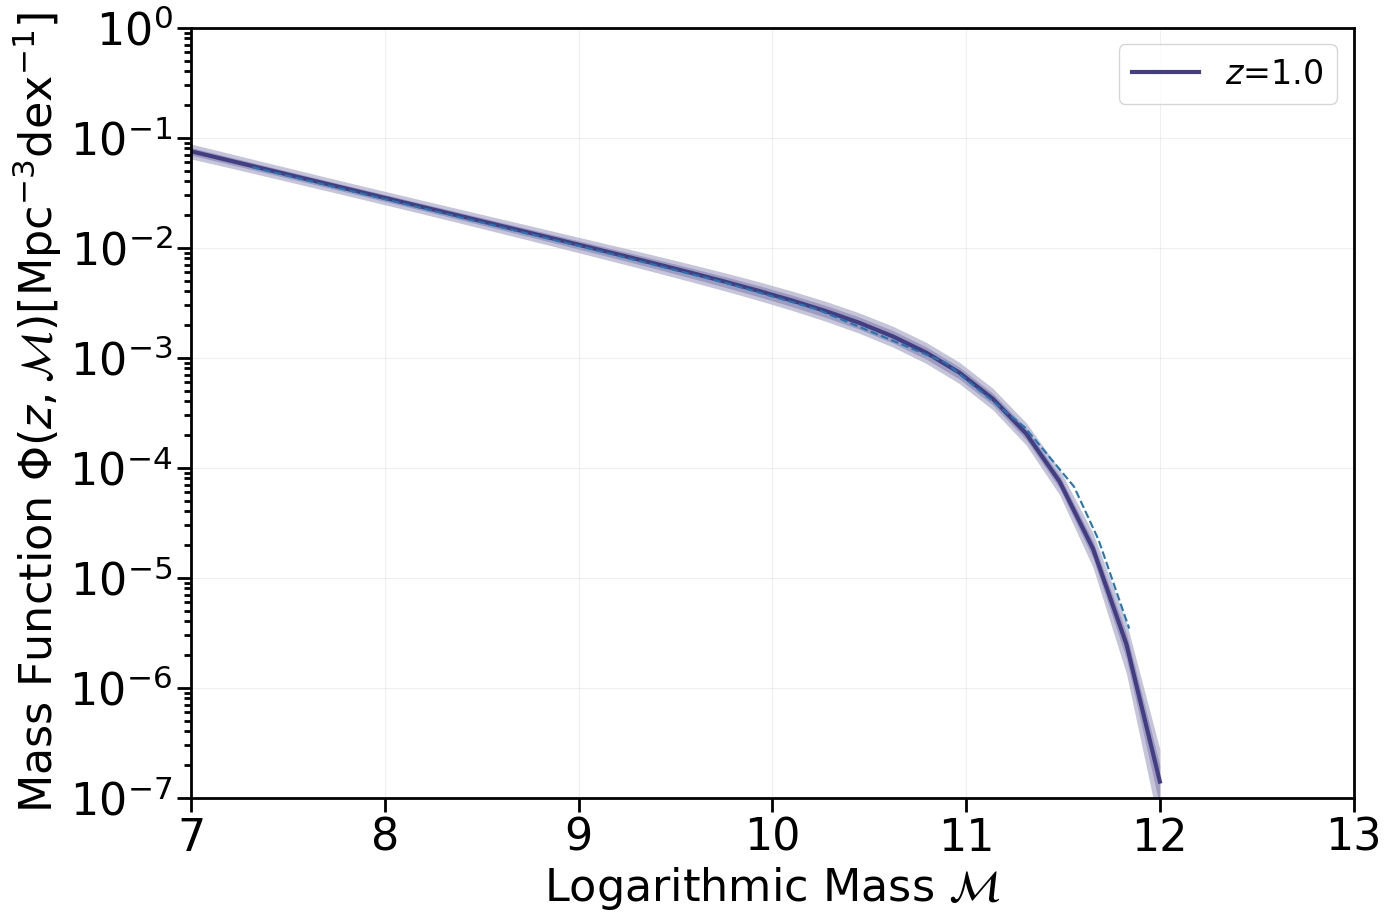

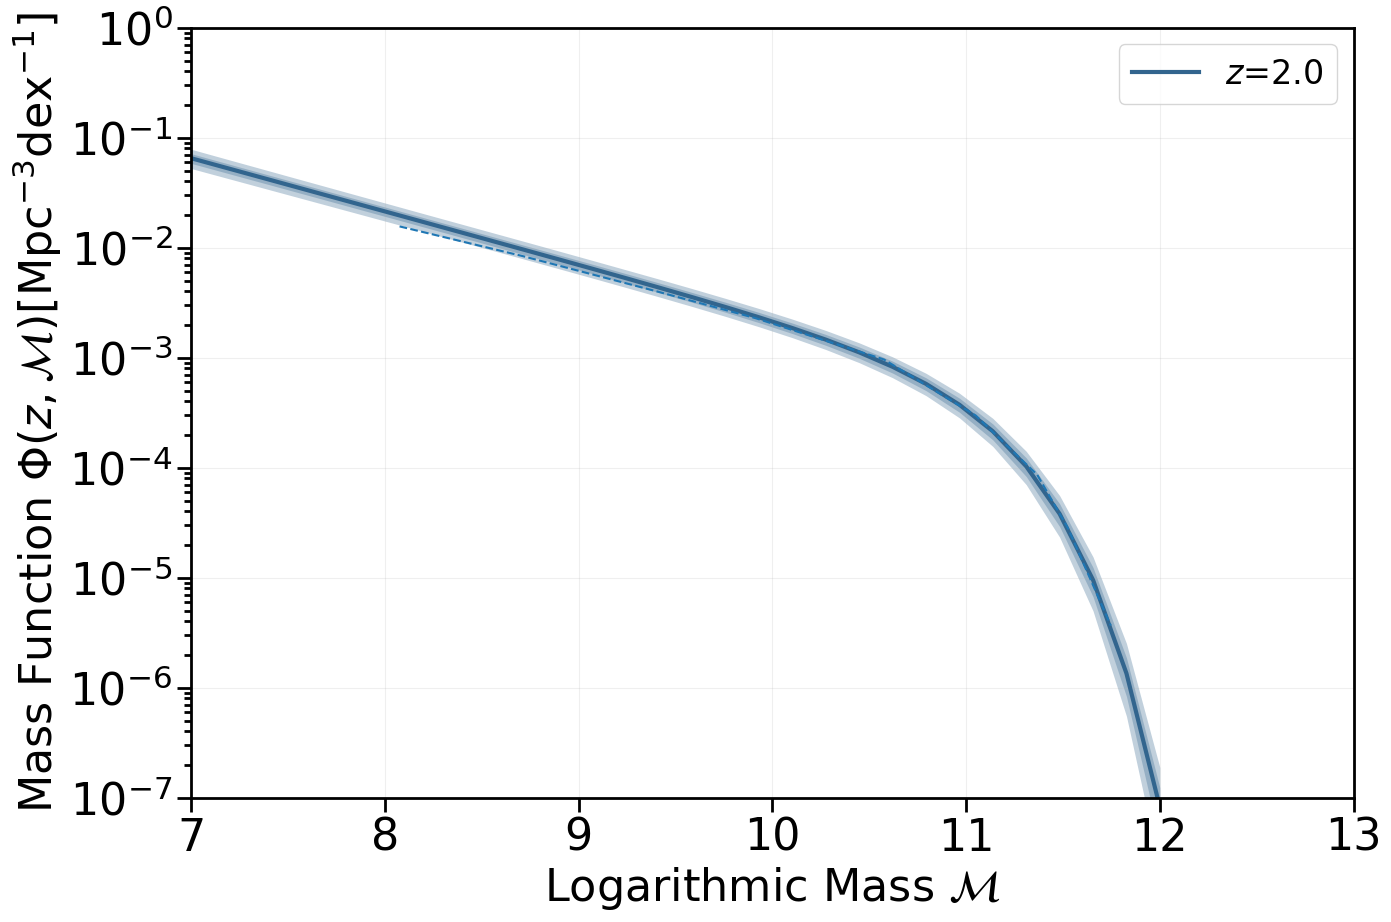

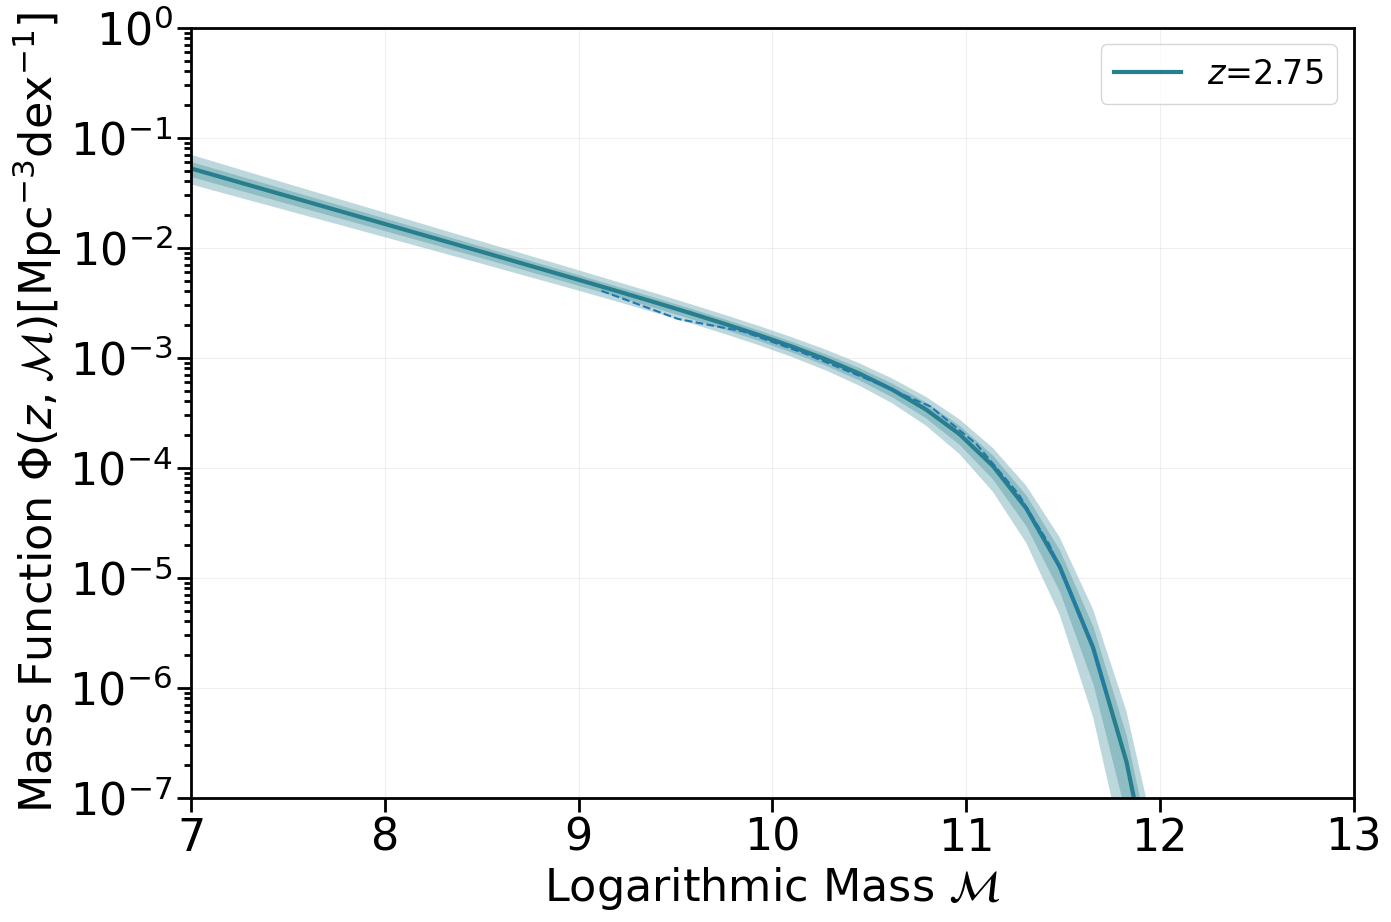

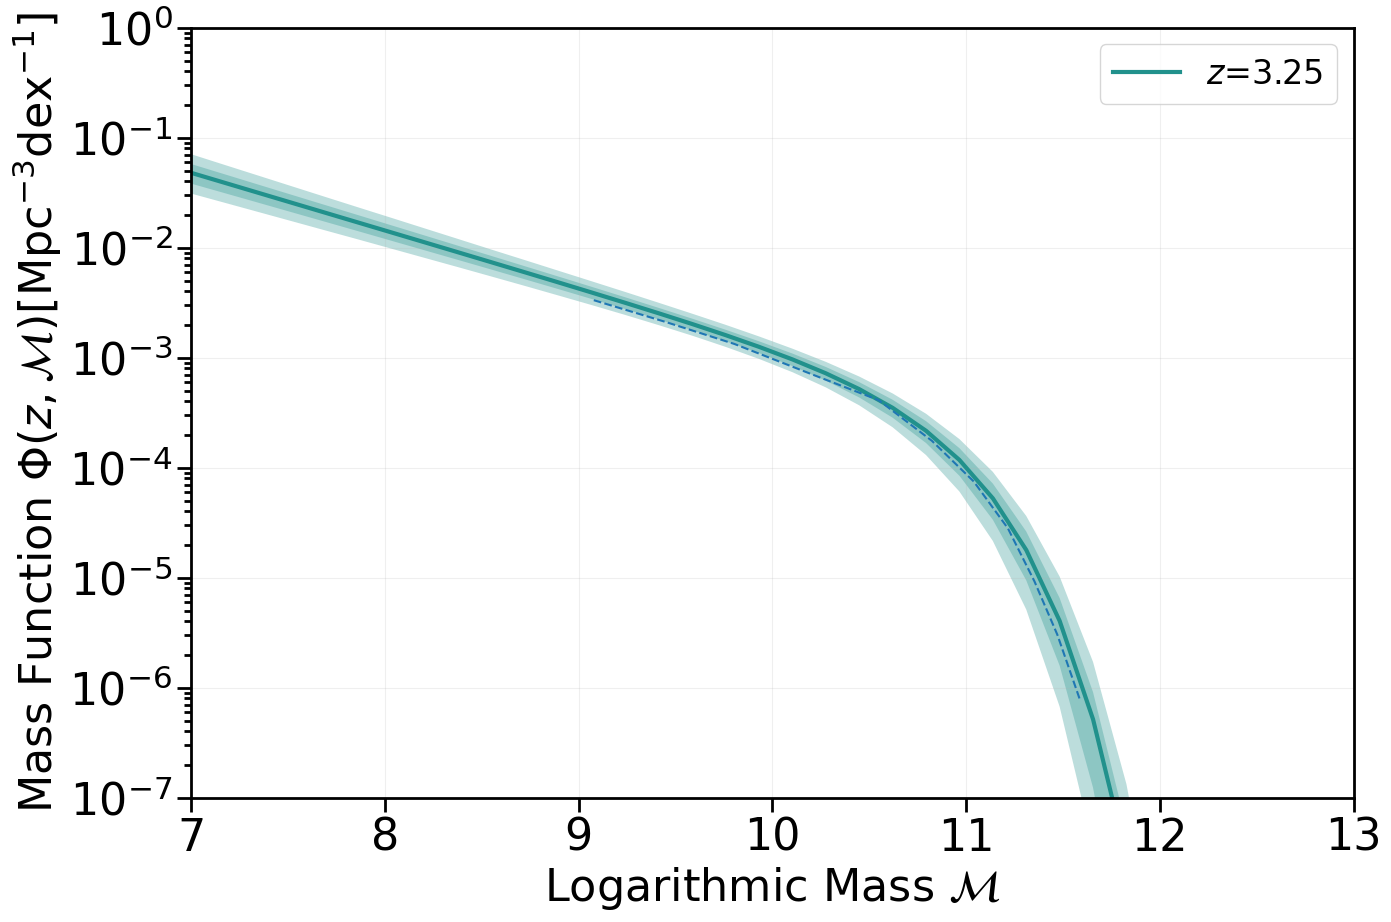

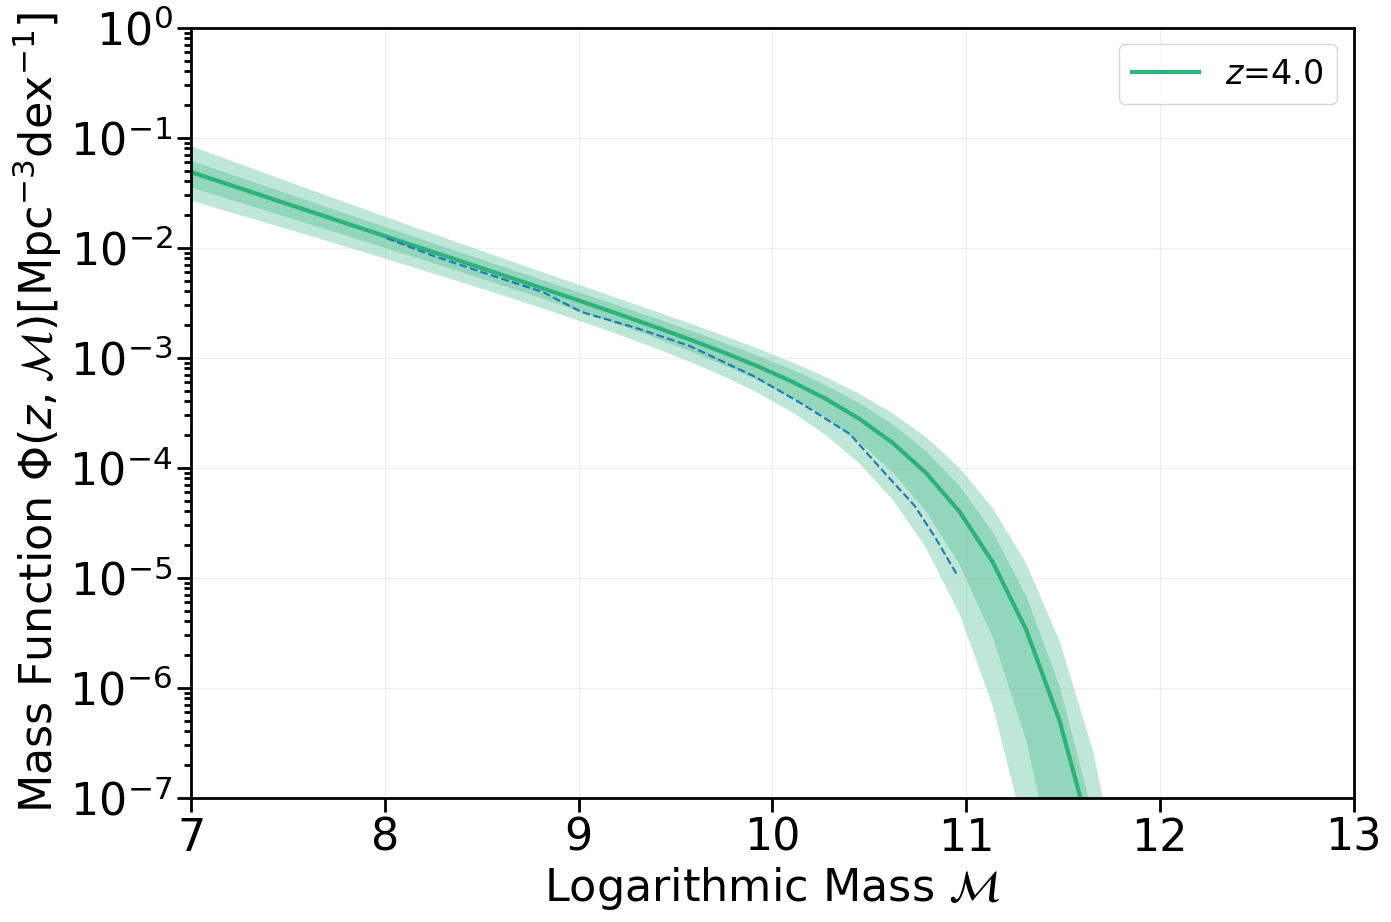

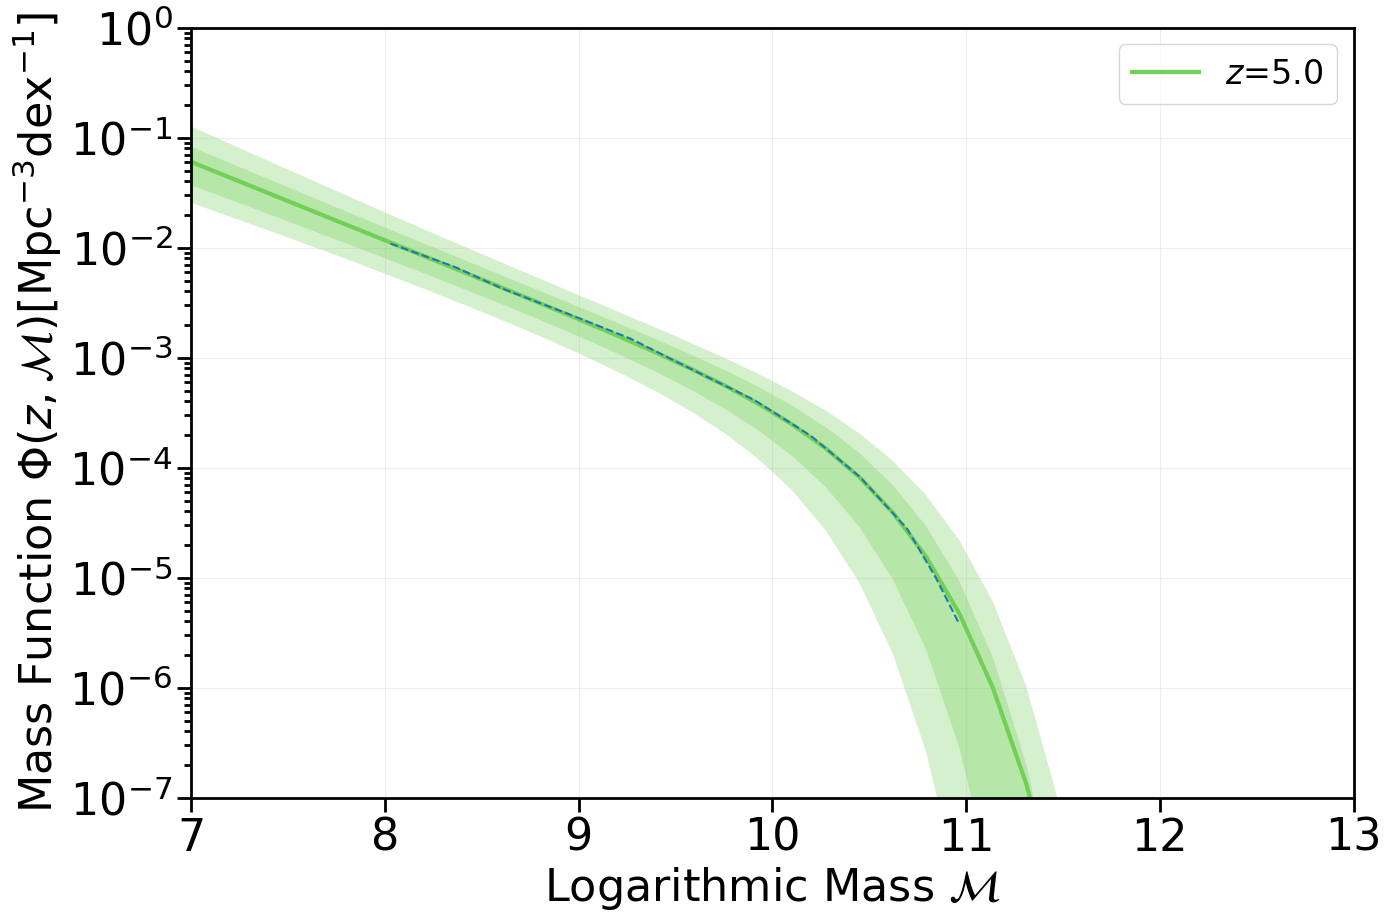

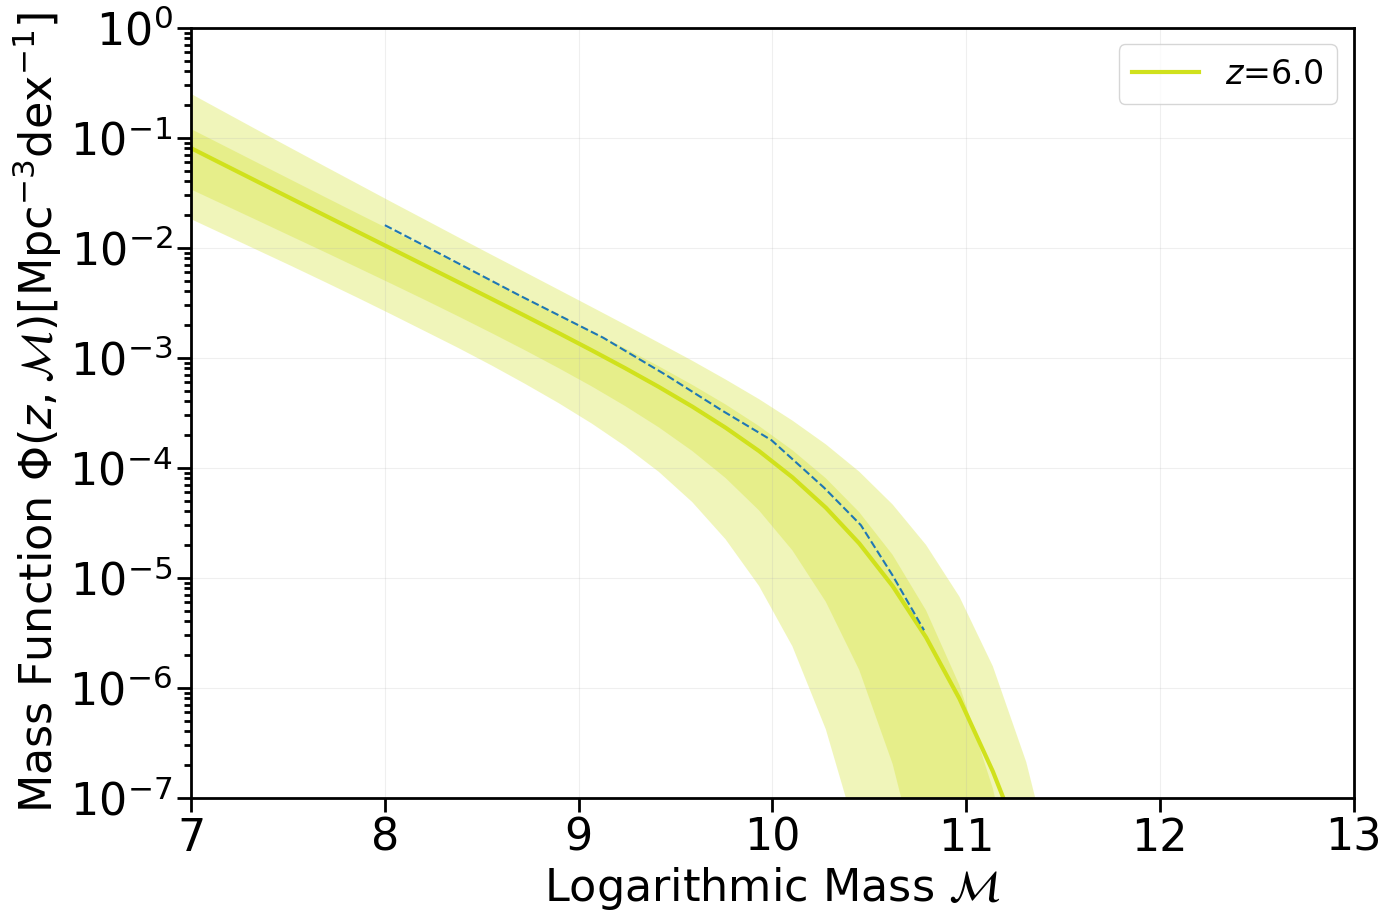

In [70]:
#0.75-1.25
fig1 = plt.figure(figsize=(15, 10))
ax1=fig1.gca()

plot_mass_function_in_zbin(ax1, 0.75, 1.25)
x = np.array([7.3164556962025316, 7.759493670886076, 8.455696202531646, 9.025316455696203, 9.753164556962025, 10.227848101265824, 10.89240506329114, 11.30379746835443, 11.556962025316455, 11.683544303797468, 11.841772151898734])
y = 10**np.array([-1.268817204301075, -1.456989247311828, -1.752688172043011, -1.994623655913978, -2.317204301075269, -2.5591397849462365, -3.043010752688172, -3.6344086021505375, -4.172043010752688, -4.655913978494624, -5.46236559139785])

ax1.plot(x, y, '--')

#1.75-2.25
fig2 = plt.figure(figsize=(15, 10))
ax2=fig2.gca()

plot_mass_function_in_zbin(ax2, 1.75, 2.25)
x = np.array([8.075949367088608, 8.708860759493671, 9.405063291139241, 9.911392405063292, 10.575949367088608, 11.050632911392405, 11.367088607594937, 11.525316455696203, 11.746835443037975])
y = 10**np.array([-1.806451612903226, -2.075268817204301, -2.3978494623655915, -2.639784946236559, -3.0161290322580645, -3.5268817204301075, -4.064516129032258, -4.548387096774194, -5.435483870967742])

ax2.plot(x, y, '--')

#2.5-3.0
fig25 = plt.figure(figsize=(15, 10))
ax25=fig25.gca()

plot_mass_function_in_zbin(ax25, 2.5, 3.0)

x = np.array([9.118421052631579, 9.513157894736842, 9.848684210526315, 10.164473684210526, 10.480263157894736, 10.81578947368421, 11.052631578947368, 11.269736842105264, 11.427631578947368, 11.546052631578947, 11.644736842105264, 11.723684210526315])
y = np.array([0.004054660959462169, 0.0022504674056497025, 0.0017323528848992831, 0.0010959045429956764, 0.0006493816315762113, 0.00036042771770583164, 0.0001644027549618668, 0.0000577249594304303, 0.000020268340041003042, 0.000006665974321719075, 0.000002667696159952092, 8.773680560131944e-7])

ax25.plot(x, y, '--')

#3.0-3.5
fig3 = plt.figure(figsize=(15, 10))
ax3=fig3.gca()

plot_mass_function_in_zbin(ax3, 3.0, 3.5)

x = np.array([9.07843137254902, 9.450980392156863, 9.803921568627452, 10.215686274509803, 10.549019607843137, 10.823529411764707, 11.03921568627451, 11.215686274509803, 11.352941176470589, 11.470588235294118, 11.588235294117647])
y = np.array([0.0033321709412448166, 0.0021079661680828274, 0.001333521432163324, 0.0006932806692144523, 0.0004108056080177276, 0.0001755165936923892, 0.00007498942093324559, 0.00002811018063413649, 0.000009245046309020041, 0.000003040566774307057, 7.697747057123718e-7])

ax3.plot(x, y, '--')

#3.5-4.5
fig4 = plt.figure(figsize=(15, 10))
ax4=fig4.gca()

plot_mass_function_in_zbin(ax4, 3.5, 4.5)

x = np.array([8.00983606557377, 8.255737704918033, 8.560655737704918, 8.816393442622951, 9.01311475409836, 9.298360655737705, 9.573770491803279, 9.908196721311477, 10.134426229508197, 10.4, 10.557377049180328, 10.734426229508196, 10.842622950819672, 10.950819672131148])
y = np.array([0.01218187912010116, 0.008364673227799466, 0.005531681197617227, 0.003943831644306426, 0.002608113761201518, 0.0018594639162879234, 0.0012767987504462759, 0.0006738627168030948, 0.00039810717055349735, 0.00020235896477251576, 0.00009906457195491435, 0.00004498432668969444, 0.000022865656419247956, 0.000010780851432948595])

ax4.plot(x, y, '--')

#4.5-5.5
fig5 = plt.figure(figsize=(15, 10))
ax5=fig5.gca()

plot_mass_function_in_zbin(ax5, 4.5, 5.5)

x = np.array([8.029315960912053, 8.36156351791531, 8.60586319218241, 8.967426710097719, 9.270358306188925, 9.602605863192181, 9.905537459283387, 10.19869706840391, 10.452768729641694, 10.697068403908794, 10.843648208469055, 10.960912052117264])
y = np.array([0.010882650800586027, 0.006675592159647419, 0.004251786303382895, 0.00241920944502636, 0.001483981788967566, 0.0007543120063354622, 0.0004133581745292434, 0.00019489285531480827, 0.00008208914159638262, 0.000027594105890135863, 0.00001, 0.000003906939937054621])

ax5.plot(x, y, '--')

#5.5-6.5
fig6 = plt.figure(figsize=(15, 10))
ax6=fig6.gca()

plot_mass_function_in_zbin(ax6, 5.5, 6.5)

x = np.array([8, 8.298642533936652, 8.692307692307692, 9.126696832579185, 9.452488687782806, 9.737556561085974, 9.995475113122172, 10.266968325791854, 10.457013574660634, 10.619909502262443, 10.782805429864254])
y = np.array([0.016015682644458355, 0.008547088125592519, 0.0036998304144069656, 0.0015199110829529332, 0.0006932806692144523, 0.00033321709412448166, 0.00017782794100389227, 0.00006579332246575683, 0.00003001046517818875, 0.000010537249727360724, 0.0000033321709412448166])

ax6.plot(x, y, '--')